16/06/2018 BY PRAVIN
How to add points to timeseries graph to show buy-sell signal – matplotlib

- https://www.techtrekking.com/how-to-add-points-to-timeseries-graph-to-show-buy-sell-signal-matplotlib/


- https://github.com/conquistadorjd/python-03-matplotlib



In [16]:
################################################################################################
#	name:	timeseries_simple_with_pointer.py
#	desc:	Plots buy and sell signal on line chart
#	date:	2018-06-15
#	Author:	conquistadorjd
################################################################################################
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt


print('*** Program Started ***')

df = pd.read_csv('VAS.AX.csv')

*** Program Started ***


In [19]:
# ensuring only equity series is considered
# df = df.loc[df['Series'] == 'EQ']

# Converting date to pandas datetime format
df['Date'] = pd.to_datetime(df['Date'])
df['SMA5'] = df["Close"].rolling(20).mean()
df['SMA20']= df["Close"].rolling(100).mean()
df.head()

,Date,High,Low,Open,Close,Volume,Adj Close,SMA5,SMA20
0,2009-05-08,50.799999,50.580002,50.619999,50.610001,915.0,38.149307,NaN,NaN
1,2009-05-11,50.799999,50.599998,50.799999,50.630001,826.0,38.164383,NaN,NaN
2,2009-05-12,50.570000,49.990002,50.570000,50.299999,7032.0,37.915627,NaN,NaN
3,2009-05-13,50.380001,49.810001,50.380001,49.840000,4531.0,37.568890,NaN,NaN
4,2009-05-14,48.849998,48.279999,48.849998,48.549999,1511.0,36.596500,NaN,NaN


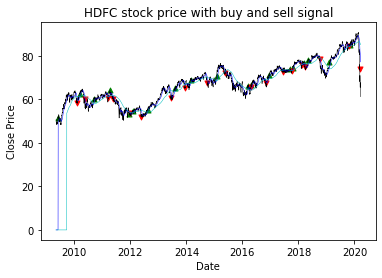

*** Program ended ***


In [24]:
#Using matplotlib to add required columns
plt.plot(df['Date'], df['Close'],linewidth=0.5,color='black')
plt.plot(df['Date'], df['SMA5'],linewidth=0.5,color='blue')
plt.plot(df['Date'], df['SMA20'],linewidth=0.5,color='c')

df['SMA5']=df['SMA5'].fillna(0)
df['SMA20']=df['SMA20'].fillna(0)

#Identifying the buy/sell zone
df['Buy'] = np.where( (df['SMA5']> df['SMA20']), 1, 0)
df['Sell'] = np.where( (df['SMA5']< df['SMA20']), 1, 0)

##identify buy sell signal
df['Buy_ind'] = np.where( (df['Buy'] > df['Buy'].shift(1)),1,0)
df['Sell_ind'] = np.where( (df['Sell'] > df['Sell'].shift(1)),1,0)
# print(df.dtypes)
# print(df.head(20))

## plotting the buy and sellsignals on graph
plt.scatter(df.loc[df['Buy_ind'] ==1 , 'Date'].values,df.loc[df['Buy_ind'] ==1, 'Close'].values, label='skitscat', color='green', s=25, marker="^")
plt.scatter(df.loc[df['Sell_ind'] ==1 , 'Date'].values,df.loc[df['Sell_ind'] ==1, 'Close'].values, label='skitscat', color='red', s=25, marker="v")

## Adding labels
plt.xlabel('Date')  
plt.ylabel('Close Price')  
plt.title('HDFC stock price with buy and sell signal') 

# Saving image
plt.savefig('HDFC with SMA 20-100 Buy sell.png')

# In case you dont want to save image but just displya it
plt.show()
df.to_csv('temp_hdfc.csv')
print('*** Program ended ***')



In [22]:
df['SMA5']=df['SMA5'].fillna(0)
df['SMA20']=df['SMA20'].fillna(0)

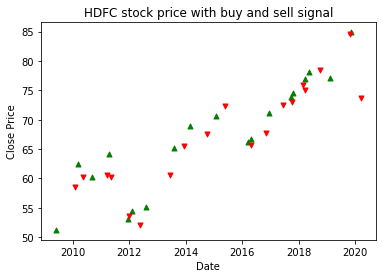

*** Program ended ***


In [23]:
 
#Identifying the buy/sell zone
df['Buy'] = np.where( (df['SMA5']> df['SMA20']), 1, 0)
df['Sell'] = np.where( (df['SMA5']< df['SMA20']), 1, 0)

##identify buy sell signal
df['Buy_ind'] = np.where( (df['Buy'] > df['Buy'].shift(1)),1,0)
df['Sell_ind'] = np.where( (df['Sell'] > df['Sell'].shift(1)),1,0)
# print(df.dtypes)
# print(df.head(20))

## plotting the buy and sellsignals on graph
plt.scatter(df.loc[df['Buy_ind'] ==1 , 'Date'].values,df.loc[df['Buy_ind'] ==1, 'Close'].values, label='skitscat', color='green', s=25, marker="^")
plt.scatter(df.loc[df['Sell_ind'] ==1 , 'Date'].values,df.loc[df['Sell_ind'] ==1, 'Close'].values, label='skitscat', color='red', s=25, marker="v")

## Adding labels
plt.xlabel('Date')  
plt.ylabel('Close Price')  
plt.title('HDFC stock price with buy and sell signal') 

# Saving image
plt.savefig('HDFC with SMA 20-100 Buy sell.png')

# In case you dont want to save image but just displya it
plt.show()
df.to_csv('temp_hdfc.csv')
print('*** Program ended ***')

In [13]:
df.head()

,Date,High,Low,Open,Close,Volume,Adj Close
0,2011-05-27,50.060001,49.599998,49.599998,50.060001,200.0,32.744587
1,2011-05-30,50.220001,50.080002,50.099998,50.080002,740.0,32.757664
2,2011-05-31,51.209999,51.150002,51.209999,51.150002,158.0,33.457554
3,2011-06-01,50.480000,50.330002,50.330002,50.480000,350.0,33.019318
4,2011-06-02,50.500000,49.220001,50.500000,49.220001,243.0,32.195145


In [11]:
df[df['Buy_ind']==1]

,Symbol,Series,Date,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,...,Turnover,No. of Trades,Deliverable Qty,% Dly Qt to Traded Qty,SMA5,SMA20,Buy,Sell,Buy_ind,Sell_ind
23,HDFCBANK,EQ,2016-07-13,1202.15,1199.8,1201.95,1193.3,1198.10,1197.75,1198.59,...,2.003768e+09,30747,1217492,72.83,1175.4300,0.0000,1,0,1,0
184,HDFCBANK,EQ,2017-02-01,1286.65,1286.2,1310.00,1280.5,1307.05,1305.70,1296.22,...,3.535648e+09,35707,1732314,63.51,1242.4900,1237.7835,1,0,1,0
591,HDFCBANK,EQ,2018-04-06,1908.90,1912.2,1926.45,1905.8,1920.10,1923.40,1917.27,...,1.783069e+09,24914,466973,50.21,1875.9725,1874.6170,1,0,1,0


In [6]:
df['Buy'].value_counts()

1    417
0     80
Name: Buy, dtype: int64

In [10]:
df.size
df.shape
#df.ndim

(497, 21)